In [1]:
import re
import numpy as np
import pandas as pd
import warnings
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
warnings.filterwarnings("ignore")

In [2]:
c = pd.read_csv("r.csv")

In [3]:
c

,Unnamed: 0,City,Type_of_BHK,Address,Type_of_Building,price_per_sqft,Status,Transaction,Furnishing,Area(per_sqft),Price_in_INR
0,0,Hyderabad,1,"Patancheru, Hyderabad",Flat,4499,Under Construction,New Property,Unfurnished,650.0,2920000.0
1,1,Hyderabad,1,"Ahmadguda, Secunderabad, Hyderabad",Flat,4809,Ready to Move,New Property,Unfurnished,590.0,2840000.0
2,2,Hyderabad,1,"Ayyappa Society, Hyderabad",Flat,7143,Under Construction,New Property,Furnished,225.0,2500000.0
3,3,Hyderabad,1,"Kompally, Hyderabad",Flat,5673,Under Construction,New Property,Unfurnished,400.0,3500000.0
4,4,Hyderabad,1,"Kondapur, Hyderabad",Flat,11887,Ready to Move,New Property,Unfurnished,265.0,3150000.0
...,...,...,...,...,...,...,...,...,...,...,...
1511,1514,Kolkata,5,Salt Lake City Sector 2,Villa,8667,Ready to Move,Resale,Semi-Furnished,2200.0,26000000.0
1512,1515,Kolkata,5,"Salarpuria Silver Oak Estate, Rajarhat",House,6909,Ready to Move,Resale,Unfurnished,5500.0,38000000.0
1513,1516,Kolkata,5,Baguiati,Villa,5179,Ready to Move,Resale,Unfurnished,5600.0,29000000.0
1514,1517,Kolkata,5,Rajarhat,House,7828,Ready to Move,New Property,Unfurnished,2100.0,20000000.0


In [4]:
c.drop("Unnamed: 0",axis = 1, inplace=True)

In [5]:
c.columns

Index(['City', 'Type_of_BHK', 'Address', 'Type_of_Building', 'price_per_sqft',
       'Status', 'Transaction', 'Furnishing', 'Area(per_sqft)',
       'Price_in_INR'],
      dtype='object')

In [6]:
c.dtypes

City                 object
Type_of_BHK           int64
Address              object
Type_of_Building     object
price_per_sqft        int64
Status               object
Transaction          object
Furnishing           object
Area(per_sqft)      float64
Price_in_INR        float64
dtype: object

In [7]:
c

,City,Type_of_BHK,Address,Type_of_Building,price_per_sqft,Status,Transaction,Furnishing,Area(per_sqft),Price_in_INR
0,Hyderabad,1,"Patancheru, Hyderabad",Flat,4499,Under Construction,New Property,Unfurnished,650.0,2920000.0
1,Hyderabad,1,"Ahmadguda, Secunderabad, Hyderabad",Flat,4809,Ready to Move,New Property,Unfurnished,590.0,2840000.0
2,Hyderabad,1,"Ayyappa Society, Hyderabad",Flat,7143,Under Construction,New Property,Furnished,225.0,2500000.0
3,Hyderabad,1,"Kompally, Hyderabad",Flat,5673,Under Construction,New Property,Unfurnished,400.0,3500000.0
4,Hyderabad,1,"Kondapur, Hyderabad",Flat,11887,Ready to Move,New Property,Unfurnished,265.0,3150000.0
...,...,...,...,...,...,...,...,...,...,...
1511,Kolkata,5,Salt Lake City Sector 2,Villa,8667,Ready to Move,Resale,Semi-Furnished,2200.0,26000000.0
1512,Kolkata,5,"Salarpuria Silver Oak Estate, Rajarhat",House,6909,Ready to Move,Resale,Unfurnished,5500.0,38000000.0
1513,Kolkata,5,Baguiati,Villa,5179,Ready to Move,Resale,Unfurnished,5600.0,29000000.0
1514,Kolkata,5,Rajarhat,House,7828,Ready to Move,New Property,Unfurnished,2100.0,20000000.0


<AxesSubplot:ylabel='Density'>

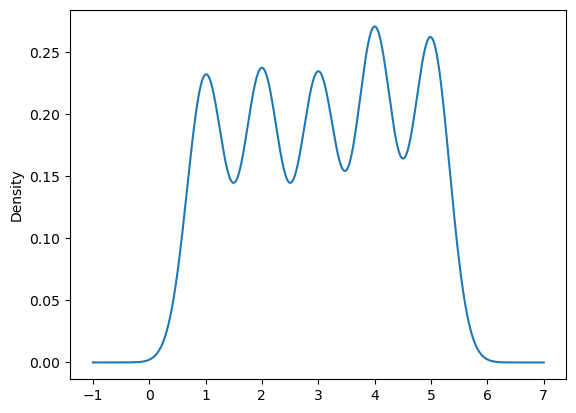

In [124]:
c['Type_of_BHK'].plot(kind='kde')

<AxesSubplot:>

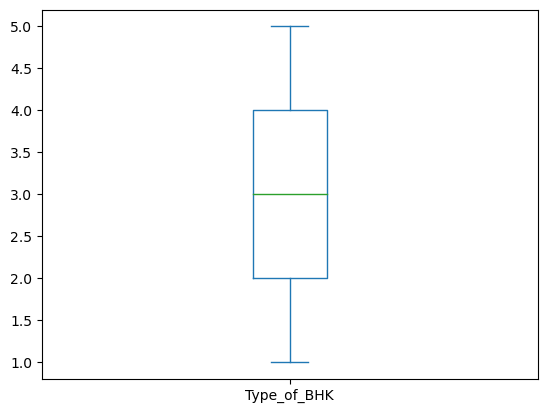

In [102]:
c['Type_of_BHK'].plot(kind='box')

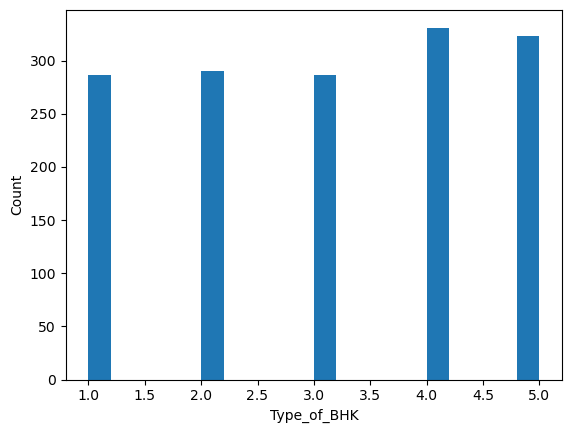

In [104]:
plt.hist(c['Type_of_BHK'], bins=20)
plt.xlabel('Type_of_BHK')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Type_of_BHK', ylabel='Density'>

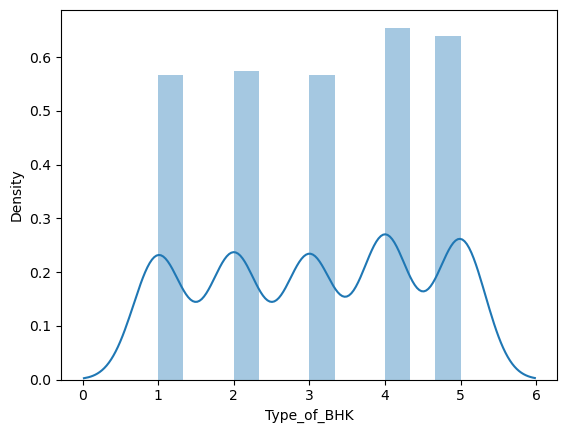

In [106]:
sns.distplot(c['Type_of_BHK'])

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

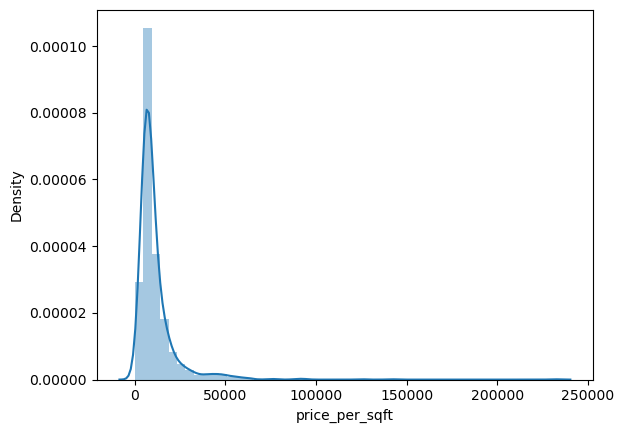

In [109]:
sns.distplot(c['price_per_sqft'])

<AxesSubplot:>

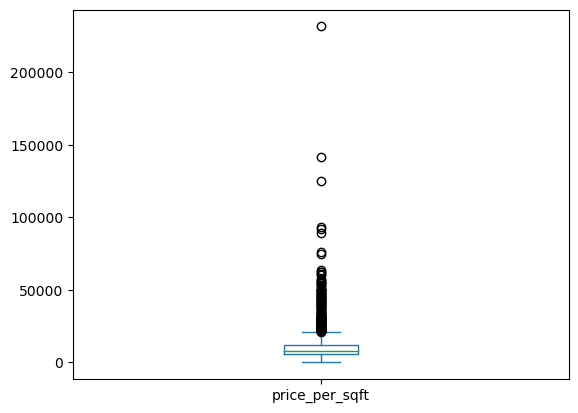

In [110]:
c['price_per_sqft'].plot(kind='box')

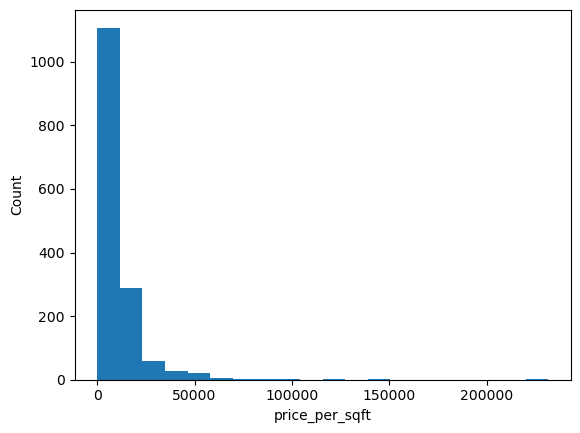

In [112]:
plt.hist(c['price_per_sqft'], bins=20)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

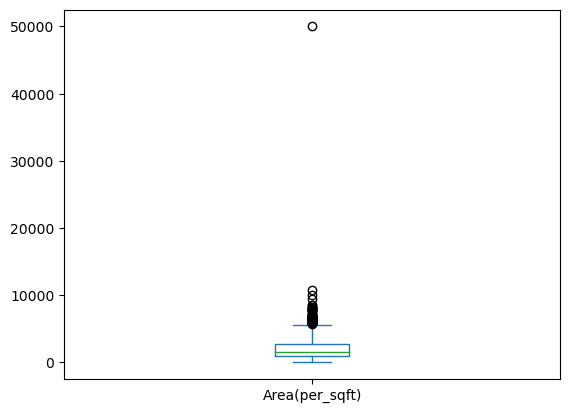

In [114]:
c['Area(per_sqft)'].plot(kind='box')

<AxesSubplot:xlabel='Area(per_sqft)', ylabel='Density'>

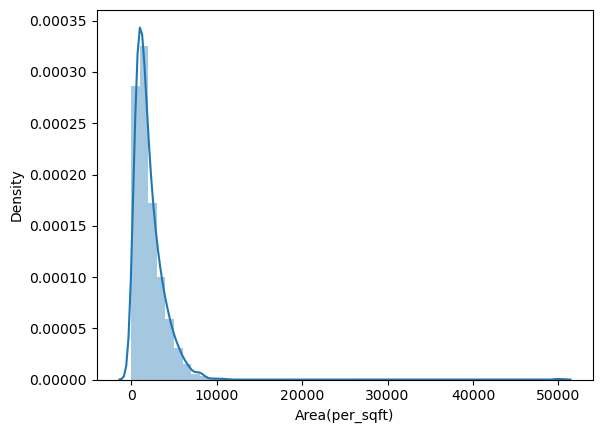

In [116]:
sns.distplot(c['Area(per_sqft)'])

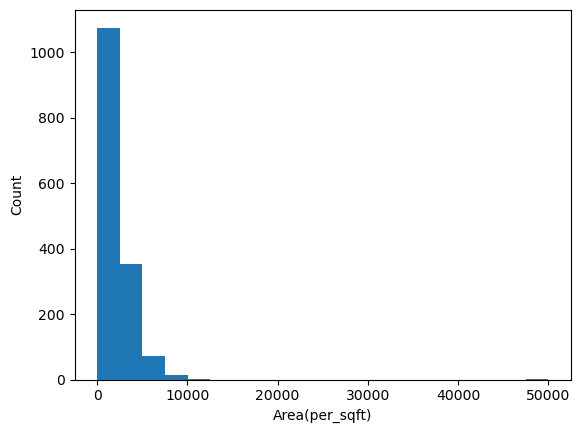

In [117]:
plt.hist(c['Area(per_sqft)'], bins=20)
plt.xlabel('Area(per_sqft)')
plt.ylabel('Count')
plt.show()

<AxesSubplot:>

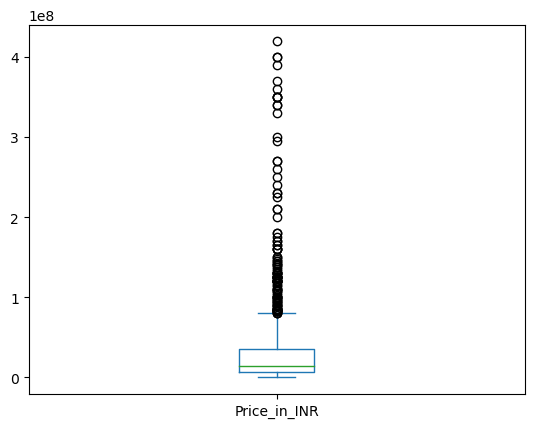

In [118]:
c['Price_in_INR'].plot(kind='box')

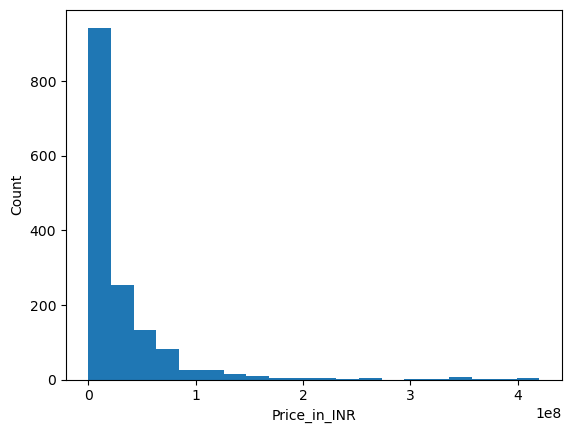

In [121]:
plt.hist(c['Price_in_INR'], bins=20)
plt.xlabel('Price_in_INR')
plt.ylabel('Count')
plt.show()

####  Insights : Data availability of each city


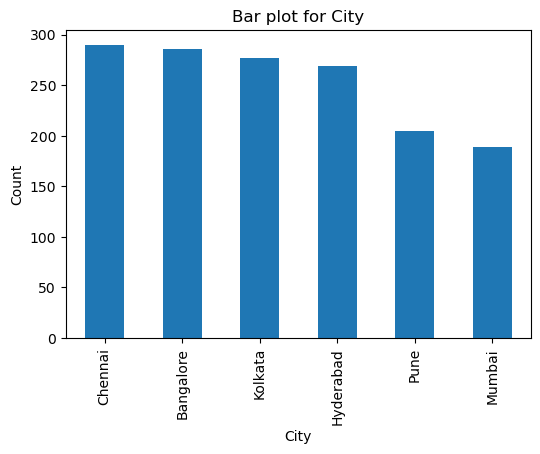

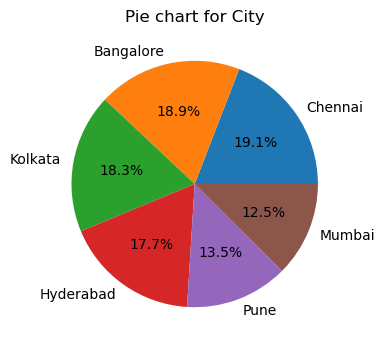

In [73]:
# Bar plot for City
plt.figure(figsize=(6,4))
c['City'].value_counts().plot(kind='bar')
plt.title('Bar plot for City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(4,4))
c['City'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart for City')
plt.ylabel('')
plt.show()

### Insights : flats occupy more space in real estate,then comes villa and houses

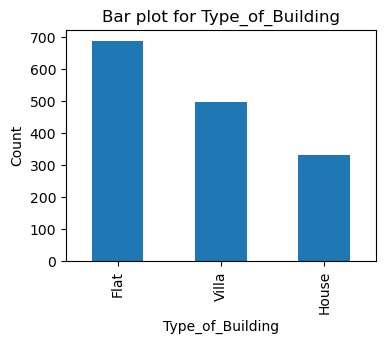

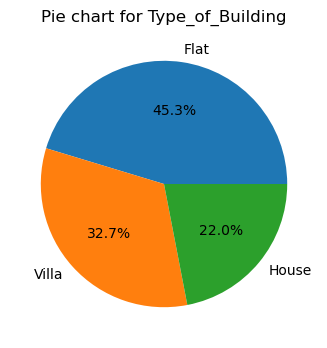

In [57]:
# Bar plot for Type_of_Building
plt.figure(figsize=(4,3))
c['Type_of_Building'].value_counts().plot(kind='bar')
plt.title('Bar plot for Type_of_Building')
plt.xlabel('Type_of_Building')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8,4))
c['Type_of_Building'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart for Type_of_Building')
plt.ylabel('')
plt.show()

### Insights : ready to move are more in ratio than under construction in all cities

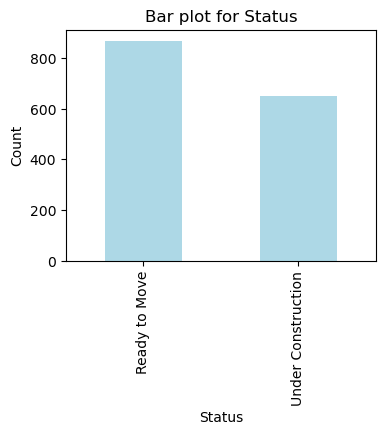

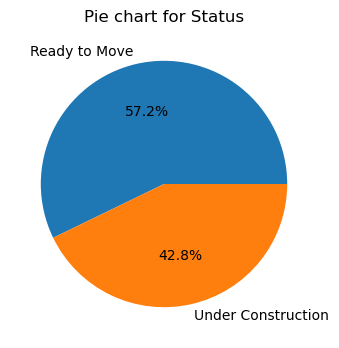

In [67]:
# Bar plot for Status
plt.figure(figsize=(4,3))
c['Status'].value_counts().plot(kind='bar', color='LightBlue')
plt.title('Bar plot for Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(4,4))
c['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart for Status')
plt.ylabel('')
plt.show()

### Insights : new property are more in ratio than resale in all cities

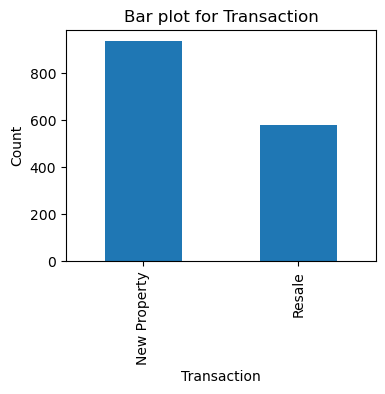

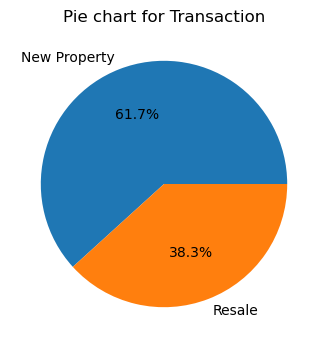

In [122]:
# Bar plot for Transaction
plt.figure(figsize=(4,3))
c['Transaction'].value_counts().plot(kind='bar')
plt.title('Bar plot for Transaction')
plt.xlabel('Transaction')
plt.ylabel('Count')
plt.show()

# Pie chart for Transaction
plt.figure(figsize=(4,4))
c['Transaction'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart for Transaction')
plt.ylabel('')
plt.show()


### Insights : real estate is good in unfurnished followed by semi furnished and furnished

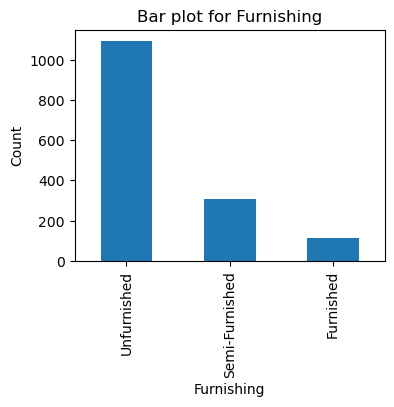

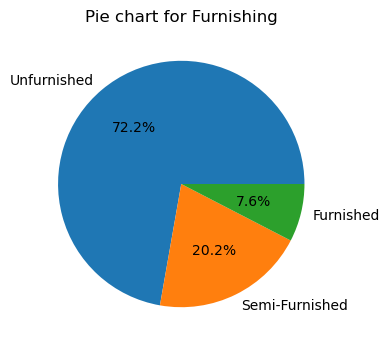

In [123]:
# Bar plot for Furnishing
plt.figure(figsize=(4,3))
c['Furnishing'].value_counts().plot(kind='bar')
plt.title('Bar plot for Furnishing')
plt.xlabel('Furnishing')
plt.ylabel('Count')
plt.show()

# Pie chart for Furnishing
plt.figure(figsize=(4,4))
c['Furnishing'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie chart for Furnishing')
plt.ylabel('')
plt.show()


#### insights : as per the data in flats (mumbai(max), Kol(min), (pune,chennai are quoating 10k), (hyd,blg are 8k))
#### insights : as per the data in Houses (mumbai(max), Kol(min), (hyd,blg,chennai are quoating 10k), (Pune are 8k))
#### insights : as per the data in Houses (mumbai(max), Kol(min), (hyd,blg,Pune are quoating 10k), (chennai are 8k))

<AxesSubplot:xlabel='City', ylabel='price_per_sqft'>

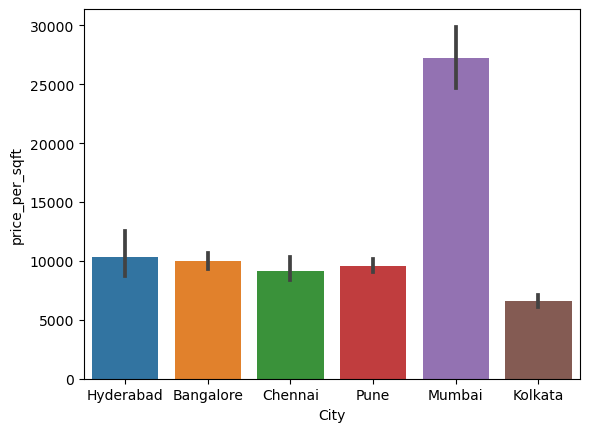

In [244]:
sns.barplot(c['City'],c['price_per_sqft'])

#insights : as per the data mumbai real-estate is high compared to other cities(Hyd, Bgl, Chen, Kol, Pune) quoating - 30,000 per sqft (max)

>#### insights : mumbai real-estate is high compared to other cities(Hyd, Bgl, Chen, Kol, Pune) quoating - 30,000 per sqft (max)

<AxesSubplot:xlabel='Type_of_Building', ylabel='price_per_sqft'>

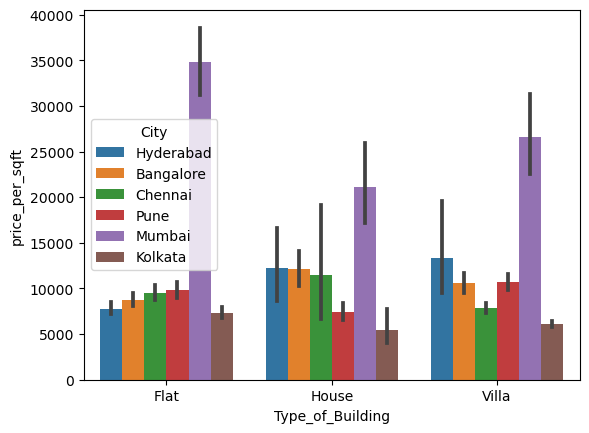

In [245]:
sns.barplot(c['Type_of_Building'], c['price_per_sqft'],hue=c['City'])
# plt.legend(bbox_anchor = (1,1))

>Insights : city vise distribution of types of building comparing with price per sft.

>mumbai goes first in all types of building followed by hyd,banglore,chennai,pune and kolkata

<AxesSubplot:xlabel='City', ylabel='count'>

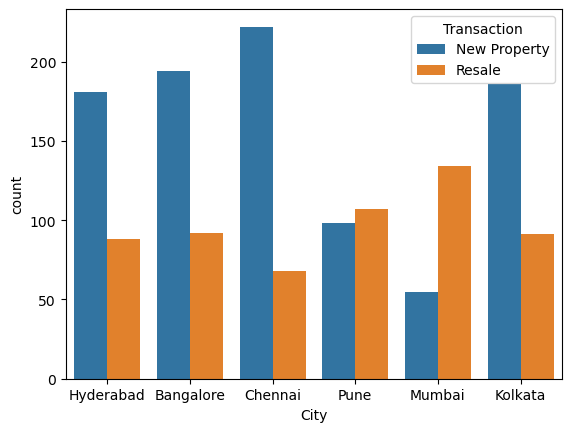

In [246]:
sns.countplot(data=c, x="City", hue="Transaction")

>Insights : city vise distribution of new property and resale list, where chennai goes first in new property 

> followed by banglore,hyd,kolkata,pune and mumbai is least in new property 

> mumbai stands first in resale property then followed by pune,banglore,kolkata,hyd,chennai

<AxesSubplot:xlabel='City', ylabel='count'>

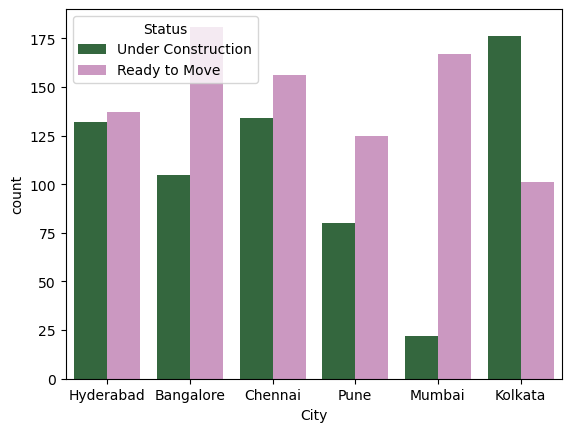

In [247]:
sns.countplot(data= c, x = "City", hue = "Status", palette='cubehelix')

#### Insights :- city vise distribution of status (ready to move n underconstruction)

#### Ready to move :- banglore has more no.of ready to move properties,followed by    mumbai,chennai,hyd,pune,kolkata

#### Under Constructions :- kolkata has more no.of under construction properities, followed by hyd,chennai,pune


<AxesSubplot:xlabel='Type_of_BHK', ylabel='Area(per_sqft)'>

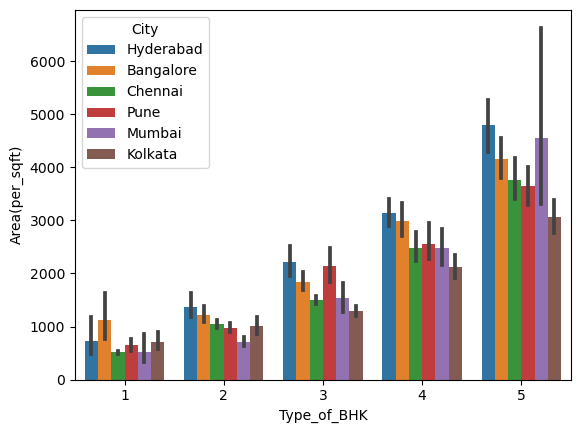

In [75]:
sns.barplot(c['Type_of_BHK'], c['Area(per_sqft)'],hue=c['City'])


>#### insights : Comparision of Average area distribution of each type of bhks i.e 1bhk,2bhk,3bhk,4bhk,5bhk with cities
>#### 1bhk :- banglore occupies more area followed by hyd,kolkata,pune,chennai,mumbai
>#### 2bhk:- hyd occupies more area followed by banglore,chennai,pune,kolkata,mumbai
>#### 3bhk:- hyd & pune occupies more area followed by banglore,chennai & mumbai,kolkata
>#### 4bhk:- hyd occupies more area followed by banglore,pune,chennai& mumbai,kolkata.
>#### 5bhk:- hyd occupies more area followed by mumbai,banglore,chennai,pune,kolkata.

<AxesSubplot:xlabel='Type_of_BHK', ylabel='count'>

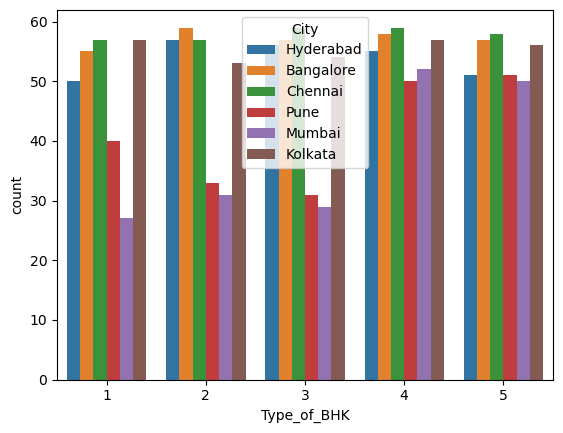

In [249]:
sns.countplot(data= c, x = "Type_of_BHK", hue = "City")

>#### insights : Count of Type_of_BHK in each City i.e  1bhk,2bhk,3bhk,4bhk,5bhk with cities mumbai,chennai,hyd,pune,kolkata,bangalore

In [77]:
pivot

Furnishing,City,Type_of_Building,Furnished,Semi-Furnished,Unfurnished
0,Bangalore,Flat,6,15,124
1,Bangalore,House,5,32,29
2,Bangalore,Villa,3,13,59
3,Chennai,Flat,4,19,123
4,Chennai,House,3,16,21
5,Chennai,Villa,3,20,81
6,Hyderabad,Flat,8,16,112
7,Hyderabad,House,3,12,40
8,Hyderabad,Villa,5,13,60
9,Kolkata,Flat,2,7,129


In [16]:
c

,City,Type_of_BHK,Address,Type_of_Building,price_per_sqft,Status,Transaction,Furnishing,Area(per_sqft),Price_in_INR
0,Hyderabad,1,"Patancheru, Hyderabad",Flat,4499,Under Construction,New Property,Unfurnished,650.0,2920000.0
1,Hyderabad,1,"Ahmadguda, Secunderabad, Hyderabad",Flat,4809,Ready to Move,New Property,Unfurnished,590.0,2840000.0
2,Hyderabad,1,"Ayyappa Society, Hyderabad",Flat,7143,Under Construction,New Property,Furnished,225.0,2500000.0
3,Hyderabad,1,"Kompally, Hyderabad",Flat,5673,Under Construction,New Property,Unfurnished,400.0,3500000.0
4,Hyderabad,1,"Kondapur, Hyderabad",Flat,11887,Ready to Move,New Property,Unfurnished,265.0,3150000.0
...,...,...,...,...,...,...,...,...,...,...
1511,Kolkata,5,Salt Lake City Sector 2,Villa,8667,Ready to Move,Resale,Semi-Furnished,2200.0,26000000.0
1512,Kolkata,5,"Salarpuria Silver Oak Estate, Rajarhat",House,6909,Ready to Move,Resale,Unfurnished,5500.0,38000000.0
1513,Kolkata,5,Baguiati,Villa,5179,Ready to Move,Resale,Unfurnished,5600.0,29000000.0
1514,Kolkata,5,Rajarhat,House,7828,Ready to Move,New Property,Unfurnished,2100.0,20000000.0


KeyError: "None of [Index(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype='object', name='price_per_sqft')] are in the [columns]"

In [19]:
hyd_groupby = c[c['City'] == 'Hyderabad'].groupby(['Type_of_BHK', 'price_per_sqft']).size()


In [20]:
hyd_groupby

Type_of_BHK  price_per_sqft
1            2083              1
             2571              1
             3944              1
             4000              1
             4082              1
                              ..
5            21000             1
             22000             1
             30000             1
             37500             1
             231660            1
Length: 250, dtype: int64

In [25]:
import pandas as pd

hyd_groupby = c[c['City'] == 'Hyderabad'].groupby(['Type_of_BHK', 'price_per_sqft']).size()

hyd_pivot = hyd_groupby.reset_index(name='count').pivot_table(index=['Type_of_BHK', 'price_per_sqft'], fill_value=0)

print(hyd_pivot)


                            count
Type_of_BHK price_per_sqft       
1           2083                1
            2571                1
            3944                1
            4000                1
            4082                1
...                           ...
5           21000               1
            22000               1
            30000               1
            37500               1
            231660              1

[250 rows x 1 columns]


In [26]:
hyd = c[c['City'] == 'Hyderabad']

In [27]:
hyd

,City,Type_of_BHK,Address,Type_of_Building,price_per_sqft,Status,Transaction,Furnishing,Area(per_sqft),Price_in_INR
0,Hyderabad,1,"Patancheru, Hyderabad",Flat,4499,Under Construction,New Property,Unfurnished,650.0,2920000.0
1,Hyderabad,1,"Ahmadguda, Secunderabad, Hyderabad",Flat,4809,Ready to Move,New Property,Unfurnished,590.0,2840000.0
2,Hyderabad,1,"Ayyappa Society, Hyderabad",Flat,7143,Under Construction,New Property,Furnished,225.0,2500000.0
3,Hyderabad,1,"Kompally, Hyderabad",Flat,5673,Under Construction,New Property,Unfurnished,400.0,3500000.0
4,Hyderabad,1,"Kondapur, Hyderabad",Flat,11887,Ready to Move,New Property,Unfurnished,265.0,3150000.0
...,...,...,...,...,...,...,...,...,...,...
815,Hyderabad,5,"Kollur, Outer Ring Road",Villa,16667,Under Construction,New Property,Unfurnished,7200.0,120000000.0
816,Hyderabad,5,"Kalyan Puri, Secunderabad",House,8750,Ready to Move,Resale,Furnished,6000.0,52500000.0
817,Hyderabad,5,Mokila,Villa,7237,Ready to Move,New Property,Semi-Furnished,3600.0,27500000.0
818,Hyderabad,5,"Pocharam, NH 2 2",Villa,8500,Under Construction,New Property,Unfurnished,3350.0,31700000.0


In [29]:
import pandas as pd

# Assuming you have already computed hyd_groupby
hyd = c[c['City'] == 'Hyderabad']
hyd_groupby = hyd.groupby(['Type_of_BHK', 'price_per_sqft']).size()

# Creating pivot table
hyd_pivot = pd.pivot_table(hyd, values='Price_in_INR', index='Type_of_BHK', columns='price_per_sqft')

print(hyd_pivot)


price_per_sqft     2083       2571       3599       3643        3710    \
Type_of_BHK                                                              
1               1500000.0  1800000.0        NaN        NaN         NaN   
2                     NaN        NaN  4230000.0  5100000.0         NaN   
3                     NaN        NaN        NaN        NaN         NaN   
4                     NaN        NaN        NaN        NaN  12800000.0   
5                     NaN        NaN        NaN        NaN         NaN   

price_per_sqft      3750        3944       4000       4082        4200    ...  \
Type_of_BHK                                                               ...   
1                      NaN  42600000.0  2700000.0  2000000.0         NaN  ...   
2                      NaN         NaN  3620000.0        NaN         NaN  ...   
3                      NaN         NaN  6000000.0        NaN         NaN  ...   
4                      NaN         NaN        NaN        NaN         NaN  ..

In [34]:
v = hyd[hyd['Type_of_BHK'] == 1][['Type_of_BHK','Type_of_Building','Price_in_INR', 'price_per_sqft', 'Area(per_sqft)','Address',]]


In [35]:
v.to_csv("v.csv")

In [36]:
bv =  hyd[hyd['Type_of_BHK'] == 2][['Type_of_BHK','Type_of_Building','Price_in_INR', 'price_per_sqft', 'Area(per_sqft)','Address',]]

In [37]:
bv.to_csv("bv.csv")

In [38]:
jv =  hyd[hyd['Type_of_BHK'] == 3][['Type_of_BHK','Type_of_Building','Price_in_INR', 'price_per_sqft', 'Area(per_sqft)','Address',]]

In [39]:
jv.to_csv("jv.csv")

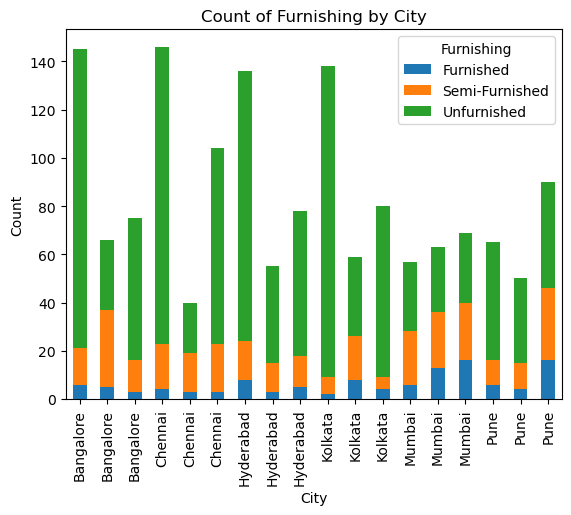

In [76]:
grouped = c.groupby(['City', 'Type_of_Building', 'Furnishing']).size().reset_index(name='Count')

pivot = grouped.pivot(index=['City', 'Type_of_Building'], columns='Furnishing', values='Count').reset_index()

pivot.plot(kind='bar', x='City', stacked=True)

plt.title('Count of Furnishing by City')
plt.xlabel('City')
plt.ylabel('Count')

plt.show()

>#### Insights:- Furnishing deatils for each city's flats,villas,houses.
>#### Real estate for Unfurnished flats|villa|houses are higher than semi furnished and furnished

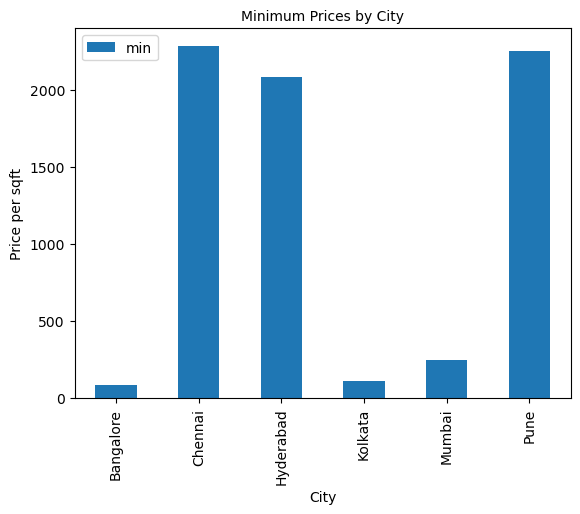

In [71]:
grouped = c.groupby('City')['price_per_sqft'].agg(['min'])
grouped.plot(kind='bar')

plt.title('Minimum Prices by City', fontsize=10)
plt.ylabel('Price per sqft', fontsize=10)

plt.show()

>#### Insights:- Minimum price per sft is in Banglore,kolkata,mumbai,hyd,pune,chennai

In [43]:
c.groupby('City')['price_per_sqft'].agg(['max'])

,max
City,
Bangalore,41818
Chennai,141667
Hyderabad,231660
Kolkata,60000
Mumbai,125000
Pune,29101


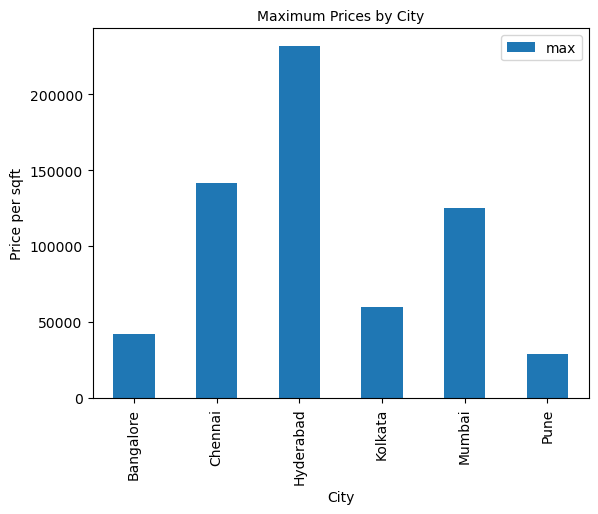

In [36]:
grouped = c.groupby('City')['price_per_sqft'].agg(['max'])

grouped.plot(kind='bar')
plt.title('Maximum Prices by City', fontsize=10)
plt.ylabel('Price per sqft', fontsize=10)

plt.show()


>#### Insights:- Maximum price per sft is in hyd,Kolkata,Mumbai,chennai,Pune, Bangalore

<AxesSubplot:xlabel='Area(per_sqft)', ylabel='price_per_sqft'>

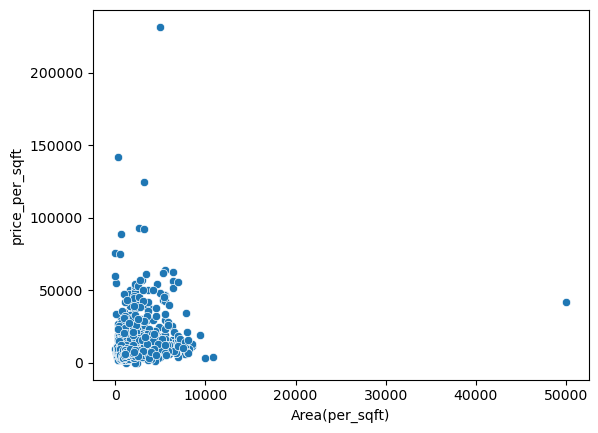

In [44]:
sns.scatterplot(c['Area(per_sqft)'],c['price_per_sqft'])

>#### Insight:- Relationship between Area(per_sqft) and price_per_sqft

<AxesSubplot:xlabel='Area(per_sqft)', ylabel='Price_in_INR'>

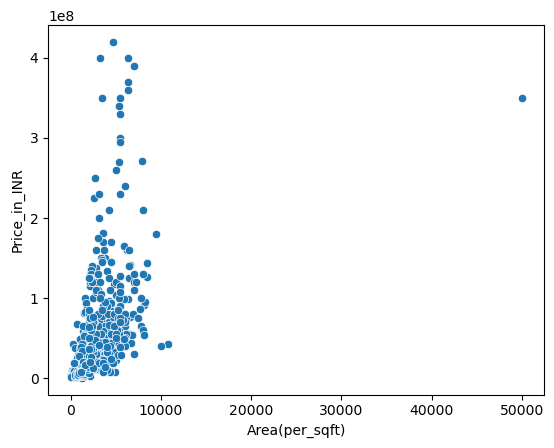

In [69]:
sns.scatterplot(c['Area(per_sqft)'],c['Price_in_INR'])

>#### Insight:- Realtionship between Area(per_sqft) and Price_in_INR

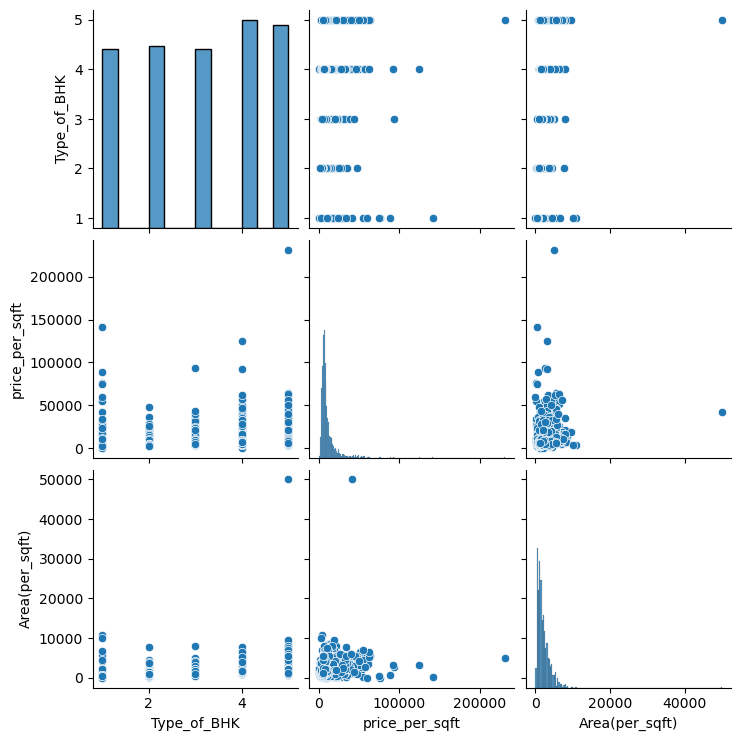

In [37]:
sns.pairplot(c)

>#### Insight - Pair Plot for Numercical Columns

<AxesSubplot:>

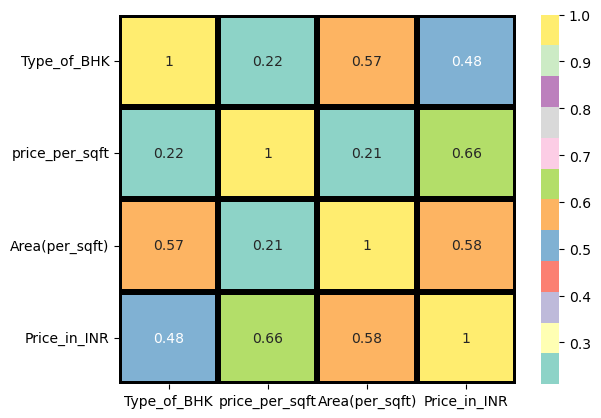

In [9]:
sns.heatmap(c.corr(), annot = True, cmap= "Set3", linecolor= "black", linewidth=4)